<a href="https://colab.research.google.com/github/trifarameliniaa/SKRIPSI/blob/main/Skripsi_Citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [8]:
from PIL import Image

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

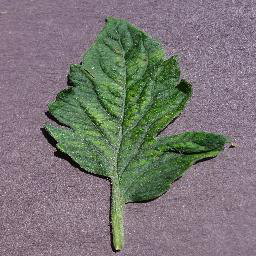

In [10]:
img = Image.open('/content/Tomato_Tomato_mosaic_virus15.jpg')
img

In [11]:
img.size

(256, 256)

In [12]:
img_array = np.array(img)
img_array

array([[[146, 127, 146],
        [140, 121, 140],
        [135, 116, 135],
        ...,
        [125, 110, 129],
        [160, 145, 164],
        [148, 133, 152]],

       [[140, 121, 140],
        [145, 126, 145],
        [147, 128, 147],
        ...,
        [118, 103, 122],
        [139, 124, 143],
        [140, 125, 144]],

       [[139, 120, 139],
        [135, 116, 135],
        [131, 112, 131],
        ...,
        [130, 115, 134],
        [146, 131, 150],
        [146, 131, 150]],

       ...,

       [[154, 134, 146],
        [116,  96, 108],
        [150, 130, 142],
        ...,
        [135, 117, 133],
        [134, 116, 132],
        [132, 114, 130]],

       [[118,  98, 110],
        [138, 118, 130],
        [135, 115, 127],
        ...,
        [129, 111, 127],
        [128, 110, 126],
        [128, 110, 126]],

       [[107,  87,  99],
        [119,  99, 111],
        [155, 135, 147],
        ...,
        [140, 122, 138],
        [141, 123, 139],
        [145, 127, 143]]

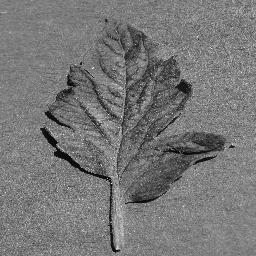

In [13]:
imgGray = img.convert('L')
imgGray.save('test_gray.jpg')
imgGray

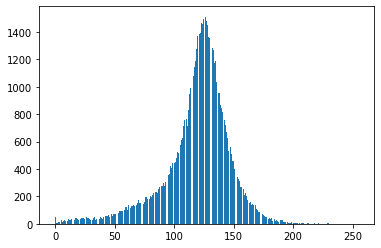

In [ ]:
h = [(im==v).sum() for v in range(256)]

plt.figure()
plt.bar(range(256), h)
plt.show()

In [22]:
imgG_array = np.array(imgGray)
imgG_array

array([[135, 129, 124, ..., 117, 152, 140],
       [129, 134, 136, ..., 110, 131, 132],
       [128, 124, 120, ..., 122, 138, 138],
       ...,
       [141, 103, 137, ..., 124, 123, 121],
       [105, 125, 122, ..., 118, 117, 117],
       [ 94, 106, 142, ..., 129, 130, 134]], dtype=uint8)

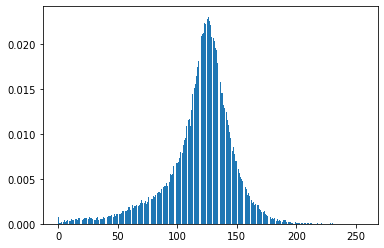

In [ ]:
# normalisasi histogram
h = np.array(h)
norm_h = h/h.sum()

plt.figure()
plt.bar(range(256), norm_h)
plt.show()

## FIS (Fuzzy Information System)

In [ ]:
# Representasi derajat keanggotan menggunakan kurva segitiga
def kurva_segitiga(cls, name, domain_min, domain_max, res, a, b, c):
  t1fs = cls(name, domain_min, domain_max, res)

  a = t1fs._adjust_domain_val(a)
  b = t1fs._adjust_domain_val(b)
  c = t1fs._adjust_domain_val(c)

  t1fs._dom = np.round(np.maximum(np.minimum((t1fs._domain-a)/(b-a), (c-t1fs._domain)/(c-b)), 0), t1fs._precision)


## Fuzzy A

In [14]:
def fungsi_segitiga(x, abc):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    abc : Array 1 dimensi, terdiri dari 3 elemen a, b, c, yang mana a<=b<=c
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(abc) == 3, 'parameter abc harus tepat tiga elemen'
    a, b, c = np.r_[abc]    # Zero-indexing di Python
    assert a <= b and b <= c, 'paremeter harus memenuhi syarat berikut: a <= b <= c.'

    miu = np.zeros(len(x))

    # Sisi Kiri
    if a != b:
        idx = np.nonzero(np.logical_and(a < x, x < b))[0]
        miu[idx] = (x[idx] - a) / float(b - a)

    # Sisi Kanan
    if b != c:
        idx = np.nonzero(np.logical_and(b < x, x < c))[0]
        miu[idx] = (c - x[idx]) / float(c - b)

    idx = np.nonzero(x == b)
    miu[idx] = 1
    
    return miu

In [24]:
def miu_fungsi_segitiga(array_x, abc, x_i):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, b, c, yang mana a<=b<=c
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(abc) == 3, 'parameter abc harus tepat tiga elemen'
    a, b, c = np.r_[abc]    # Zero-indexing di Python
    assert a <= b and b <= c, 'paremeter harus memenuhi syarat berikut: a <= b <= c.'

    miu = np.zeros(len(array_x))

    # Sisi Kiri
    if a != b:
        idx = np.nonzero(np.logical_and(a < array_x, array_x < b))[0]
        miu[idx] = (array_x[idx] - a) / float(b - a)

    # Sisi Kanan
    if b != c:
        idx = np.nonzero(np.logical_and(b < array_x, array_x < c))[0]
        miu[idx] = (b - array_x[idx]) / float(c - b)

    idx = np.nonzero(array_x == b)
    miu[idx] = 1

    dict_fuzzy=res = {round(array_x[i],2): miu[i] for i in range(len(array_x))}
    print(dict_fuzzy)
    hasil = dict_fuzzy[int(x_i)]

    return hasil

## Pembentukan Himpunan Fuzzy

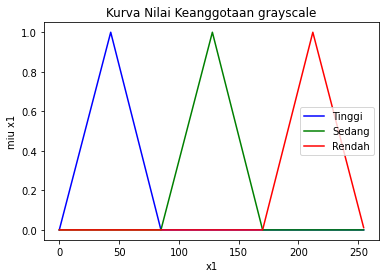

In [25]:
# Pembentukan Himpunan Fuzzy intensitas grayscale [fungsi buat sendiri]
x_gray = np.arange(0, 255, 0.5) # Semesta Pembicaraan
abc_tinggi = [0, 43, 85]
abc_sedang = [85, 128, 170]
abc_rendah = [170, 212, 255]

miu_gray_tinggi = fungsi_segitiga(x_gray, abc_tinggi)
miu_gray_sedang = fungsi_segitiga(x_gray, abc_sedang)
miu_gray_rendah = fungsi_segitiga(x_gray, abc_rendah)

import matplotlib.pyplot as plt
plt.plot(x_gray, miu_gray_tinggi, label = "Tinggi", color='blue')
plt.plot(x_gray, miu_gray_sedang, label = "Sedang", color='green')
plt.plot(x_gray, miu_gray_rendah, label = "Rendah", color='red')
plt.xlabel('x1')
plt.ylabel('miu x1')
plt.title('Kurva Nilai Keanggotaan grayscale')
plt.legend()
plt.savefig('Kurva FIS.png',format='png',dbi=1000) #Display
plt.show()

## Perhitungan Nilai Miu

In [26]:
def fuzzifikasi(x_array, abc_1, abc_2, abc_3, x, label_1, label_2, label_3):
    batas = (max(x_array)+min(x_array))
    awal = batas-68
    tengah = awal+20

    print(batas)
    print(awal)
    print(tengah)

    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, abc_1, x)
        label_hasil = label_1
    elif awal <= x <= tengah: 
        hasil=miu_fungsi_segitiga(x_array, abc_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, abc_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [28]:
#miu gray
x_gray= np.arange(0, 256, 0.5) # Semesta Pembicaraan
abc_tinggi = [0, 43, 85]
abc_sedang = [85, 128, 170]
abc_rendah = [170, 212, 255]

fuzzifikasi_gray=[]
miu_gray=[]
for i in range(0, len(imgG_array)):
    hasil=fuzzifikasi(x_gray, abc_tinggi, abc_sedang, abc_rendah, i, "Tinggi", "Sedang", "Rendah")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_gray.append(fuzz)
    miu_gray.append(m)
    
len(fuzzifikasi_gray)

255.5
187.5
207.5
{0.0: 0.0, 0.5: 0.011627906976744186, 1.0: 0.023255813953488372, 1.5: 0.03488372093023256, 2.0: 0.046511627906976744, 2.5: 0.05813953488372093, 3.0: 0.06976744186046512, 3.5: 0.08139534883720931, 4.0: 0.09302325581395349, 4.5: 0.10465116279069768, 5.0: 0.11627906976744186, 5.5: 0.12790697674418605, 6.0: 0.13953488372093023, 6.5: 0.1511627906976744, 7.0: 0.16279069767441862, 7.5: 0.1744186046511628, 8.0: 0.18604651162790697, 8.5: 0.19767441860465115, 9.0: 0.20930232558139536, 9.5: 0.22093023255813954, 10.0: 0.23255813953488372, 10.5: 0.2441860465116279, 11.0: 0.2558139534883721, 11.5: 0.26744186046511625, 12.0: 0.27906976744186046, 12.5: 0.29069767441860467, 13.0: 0.3023255813953488, 13.5: 0.313953488372093, 14.0: 0.32558139534883723, 14.5: 0.3372093023255814, 15.0: 0.3488372093023256, 15.5: 0.36046511627906974, 16.0: 0.37209302325581395, 16.5: 0.38372093023255816, 17.0: 0.3953488372093023, 17.5: 0.4069767441860465, 18.0: 0.4186046511627907, 18.5: 0.43023255813953487, 

256

In [33]:
from PIL import Image
import numpy as np

w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[0:256, 0:256] = [255, 0, 0] # red patch in upper left
img = Image.fromarray(data, 'RGB')
img.save('my.png')
img.show()

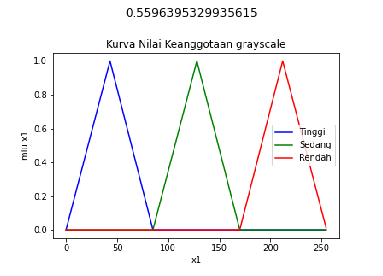

In [31]:
from skimage.io import imread,imshow,imsave
im = imread('/content/Kurva FIS.png')

plt.figure()
imshow(im)
plt.axis('off')
plt.title(entropy(im))
plt.show()

In [30]:
# Fuzzy Information Gain
def entropy(im):
    # normalisasi -> p(g)
    p = np.array([(im==v).sum() for v in range(256)])
    p = p/p.sum()
    # menghitung e = -sum(p(g)*log2(p(g)))
    e = -(p[p>0]*np.log2(p[p>0])).sum()
    
    return e

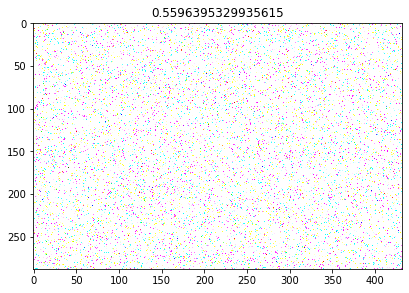

In [34]:
im_shuf = im.copy().flatten()
np.random.shuffle(im_shuf)
im_shuf = im_shuf.reshape(im.shape)

plt.figure()
imshow(im_shuf)
plt.title(entropy(im_shuf))
plt.show()

# K-Means Klastering

In [ ]:
pixel_vals = im.reshape((-1,2))
print(pixel_vals.dtype, pixel_vals.shape)

uint8 (32768, 2)


In [ ]:
Z = np.float32(pixel_vals)
print(Z.dtype, Z.shape)

float32 (32768, 2)


In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
print(label)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [ ]:
print(center)

[[ 76.86736  76.70479]
 [128.3469  128.28894]]


In [ ]:
# back convert data into integer 8-bit values

center = np.uint8(center)
center

array([[ 76,  76],
       [128, 128]], dtype=uint8)

In [ ]:
segmented_data = center[label.flatten()]
segmented_data

array([[128, 128],
       [128, 128],
       [128, 128],
       ...,
       [128, 128],
       [128, 128],
       [128, 128]], dtype=uint8)

In [ ]:
segmented_image = segmented_data.reshape((im.shape))
segmented_image

array([[128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       ...,
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       [ 76,  76, 128, ..., 128, 128, 128]], dtype=uint8)

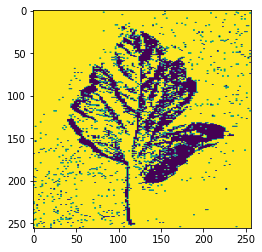

In [ ]:
# visualize the segmented image

plt.imshow(segmented_image)

In [ ]:
im = Image.fromarray(segmented_image)
im.save("outfile.jpeg")

# Evaluasi Performa

In [ ]:
# PNSR (Peak Signal to Noise Ratio)
from math import log10, sqrt

def PSNR(original, compressed):
	mse = np.mean((original - compressed) ** 2)
	if(mse == 0): 
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

def main():
	original = cv2.imread("/content/Tomato_Tomato_mosaic_virus15.jpg")
	compressed = cv2.imread("/content/outfile.jpeg", 1)
	value = PSNR(original, compressed)
	print(f"PSNR value is {value} dB")
	
if __name__ == "__main__":
	main()

PSNR value is 28.57453486540049 dB
